<a href="https://www.kaggle.com/code/waqarjon/2024-fortune-1000-companies?scriptVersionId=195033922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/2024-fortune-1000-companies/fortune1000_2024.csv
/kaggle/input/2024-fortune-1000-companies/fortune1000_2024.parquet
/kaggle/input/2024-fortune-1000-companies/fortune1000_companies.parquet
/kaggle/input/2024-fortune-1000-companies/fortune1000_companyinfo.parquet


In [2]:
df=pd.read_csv('/kaggle/input/2024-fortune-1000-companies/fortune1000_2024.csv')
pd.set_option("display.max_columns", None)
df.head()

,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,Gained_in_Rank,Dropped_in_Rank,Newcomer_to_the_Fortune500,Global500,Worlds_Most_Admired_Companies,Best_Companies_to_Work_For,Number_of_employees,MarketCap_March28_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,no,no,no,yes,yes,yes,2100000,484852.8,648125.0,6.0,15511.0,32.8,252399.0,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,2024-08-05
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0.0,no,no,no,yes,yes,no,1525000,1873675.8,574785.0,11.8,30425.0,NaN,527854.0,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,2024-08-05
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1.0,yes,no,no,yes,yes,no,161000,2647973.8,383285.0,-2.8,96995.0,-2.8,352583.0,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,2024-08-05
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1.0,yes,no,no,yes,yes,no,440000,456080.8,371622.0,14.6,22381.0,11.2,273720.0,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,2024-08-05
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2.0,yes,no,no,yes,yes,no,396500,908919.7,364482.0,20.7,96223.0,NaN,1069978.0,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,2024-08-05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Ticker                         959 non-null    object 
 3   Sector                         1000 non-null   object 
 4   Industry                       1000 non-null   object 
 5   Profitable                     1000 non-null   object 
 6   Founder_is_CEO                 1000 non-null   object 
 7   FemaleCEO                      1000 non-null   object 
 8   Growth_in_Jobs                 1000 non-null   object 
 9   Change_in_Rank                 1000 non-null   float64
 10  Gained_in_Rank                 1000 non-null   object 
 11  Dropped_in_Rank                1000 non-null   object 
 12  Newcomer_to_the_Fortune500     500 non-null    ob

<Axes: xlabel='Revenues_M', ylabel='Company'>

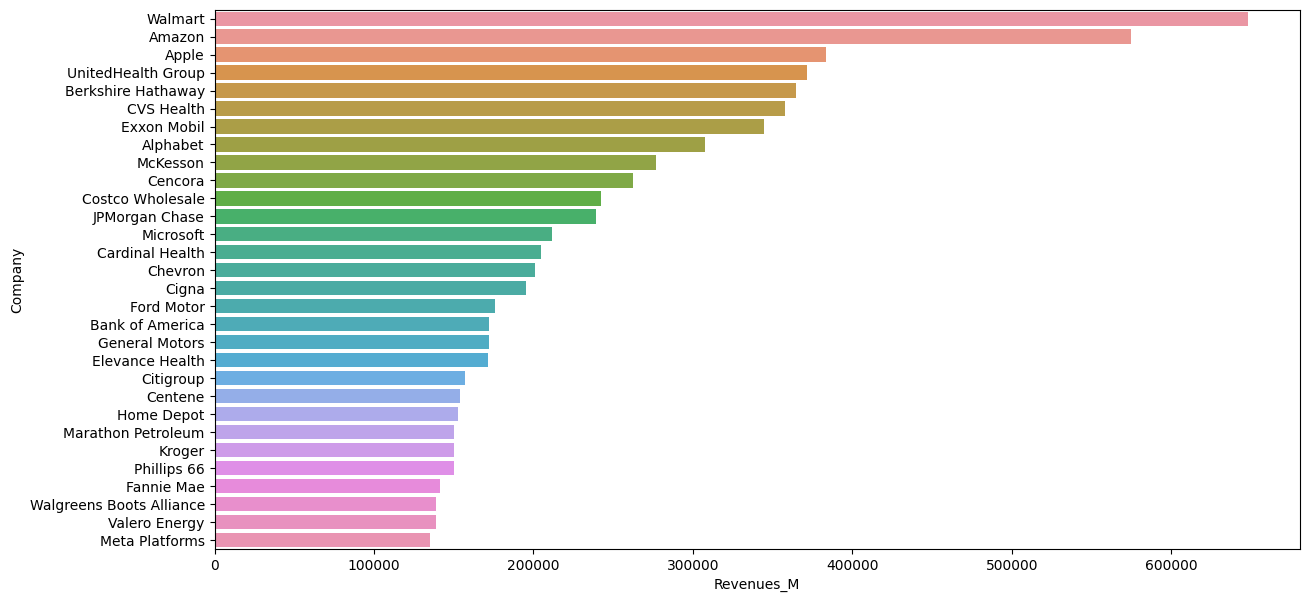

In [4]:
top_30=df.head(30)
plt.figure(figsize=(14,7))
sns.barplot(top_30, x="Revenues_M", y="Company",errorbar=None)

<Axes: xlabel='Revenues_M', ylabel='Profits_M'>

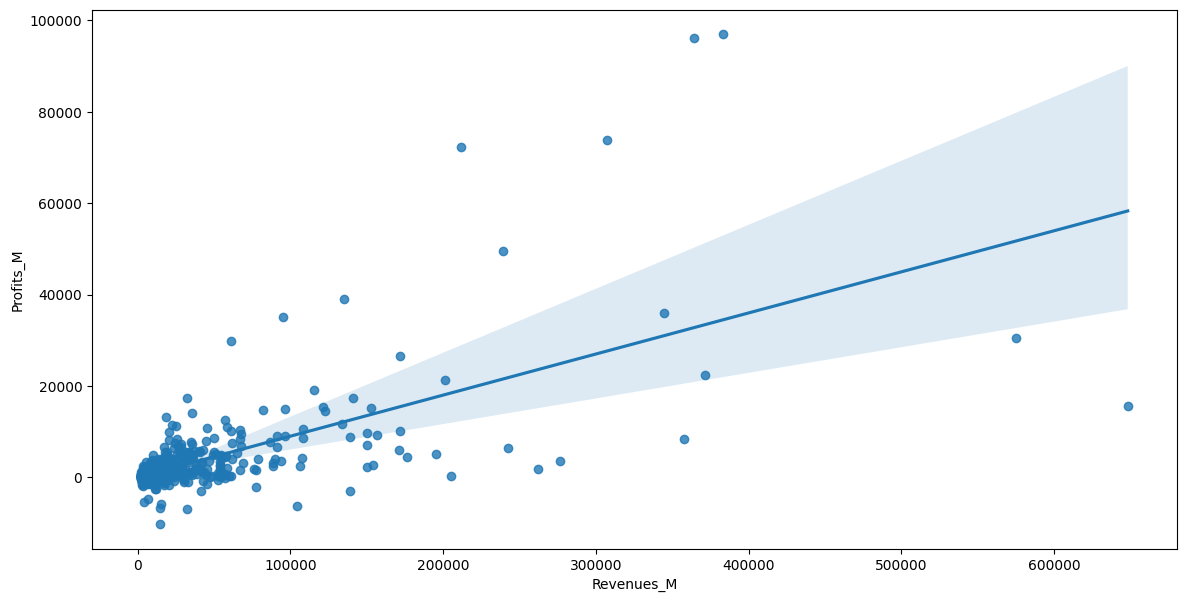

In [5]:
plt.figure(figsize=(14,7))
sns.regplot(x="Revenues_M", y="Profits_M", data=df)

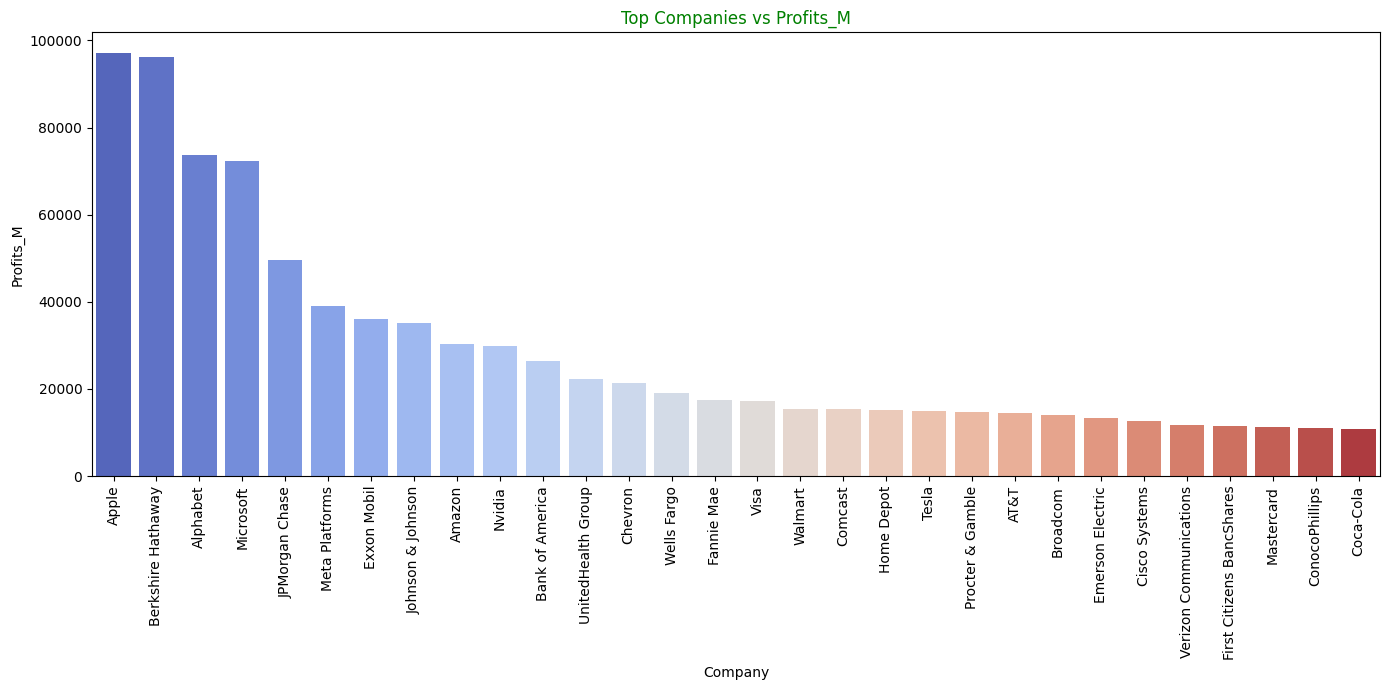

In [6]:
prof_comp = df.groupby("Company")["Profits_M"].mean().reset_index()

prof_comp = prof_comp.sort_values(by = 'Profits_M', ascending = False).head(30)

plt.figure(figsize = (14,7))

# create bar plot
sns.barplot(x = "Company", y = "Profits_M", data = prof_comp, palette = "coolwarm")
plt.title("Top Companies vs Profits_M", fontsize = 12, color = 'green')

# set x-axis rotation
plt.xticks(rotation = 90)
plt.tight_layout()

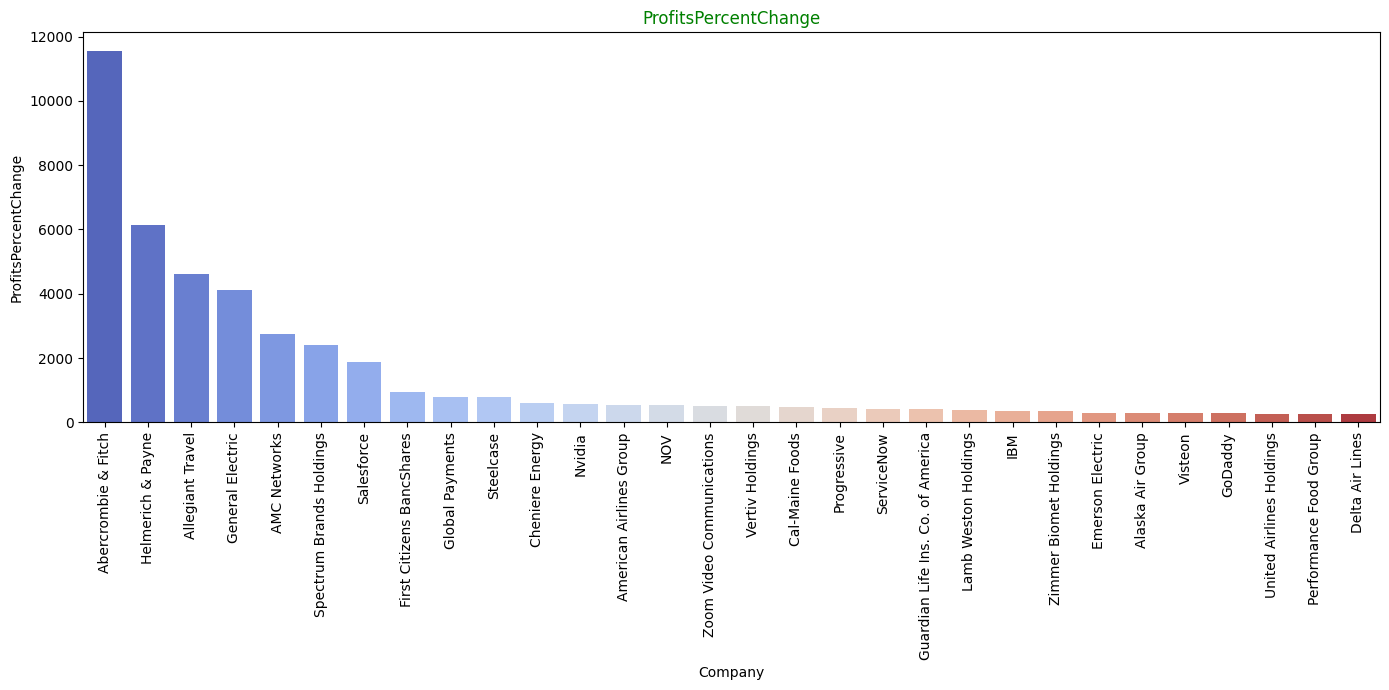

In [7]:
prof_comp_per = df.groupby("Company")["ProfitsPercentChange"].mean().reset_index()

prof_comp_per = prof_comp_per.sort_values(by = 'ProfitsPercentChange', ascending = False).head(30)

plt.figure(figsize = (14,7))

# create bar plot
sns.barplot(x = "Company", y = "ProfitsPercentChange", data = prof_comp_per, palette = "coolwarm")
plt.title("ProfitsPercentChange", fontsize = 12, color = 'green')

# set x-axis rotation
plt.xticks(rotation = 90)
plt.tight_layout()

<Axes: xlabel='Revenues_M', ylabel='Sector'>

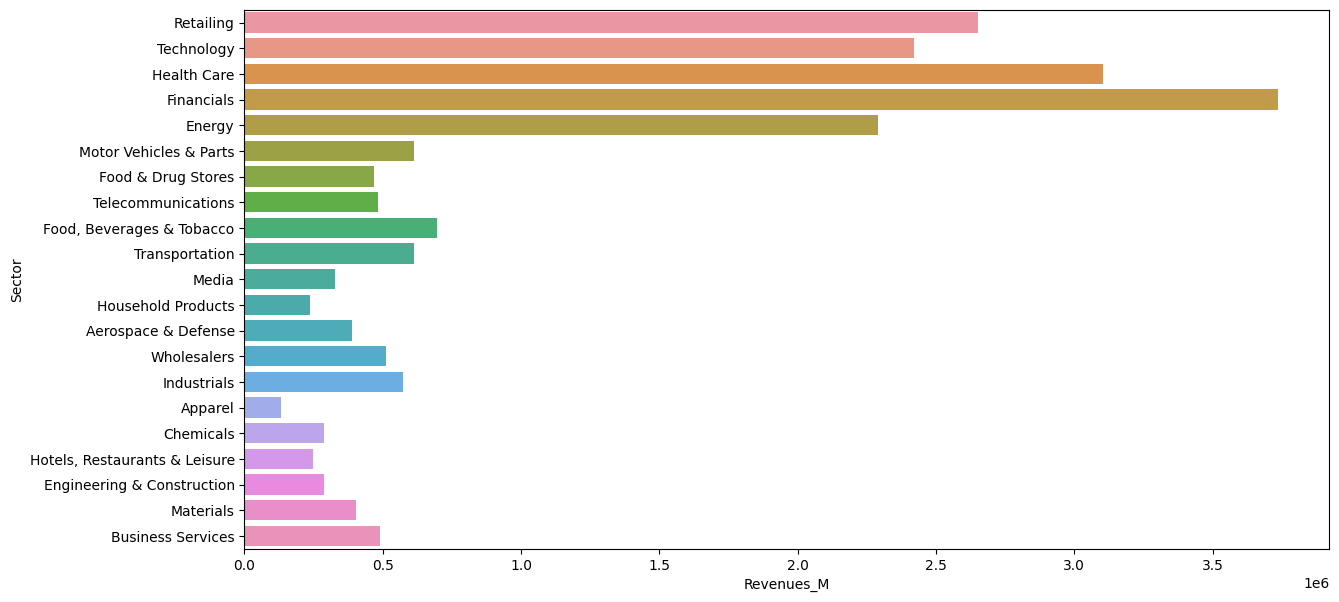

In [8]:
plt.figure(figsize=(14,7))
sns.barplot(df, x="Revenues_M", y="Sector",estimator='sum',errorbar=None)

In [9]:
total_revenue=df.groupby('Sector')[['Revenues_M']].sum()
total_revenue=total_revenue.reset_index()
total_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sector      21 non-null     object 
 1   Revenues_M  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes


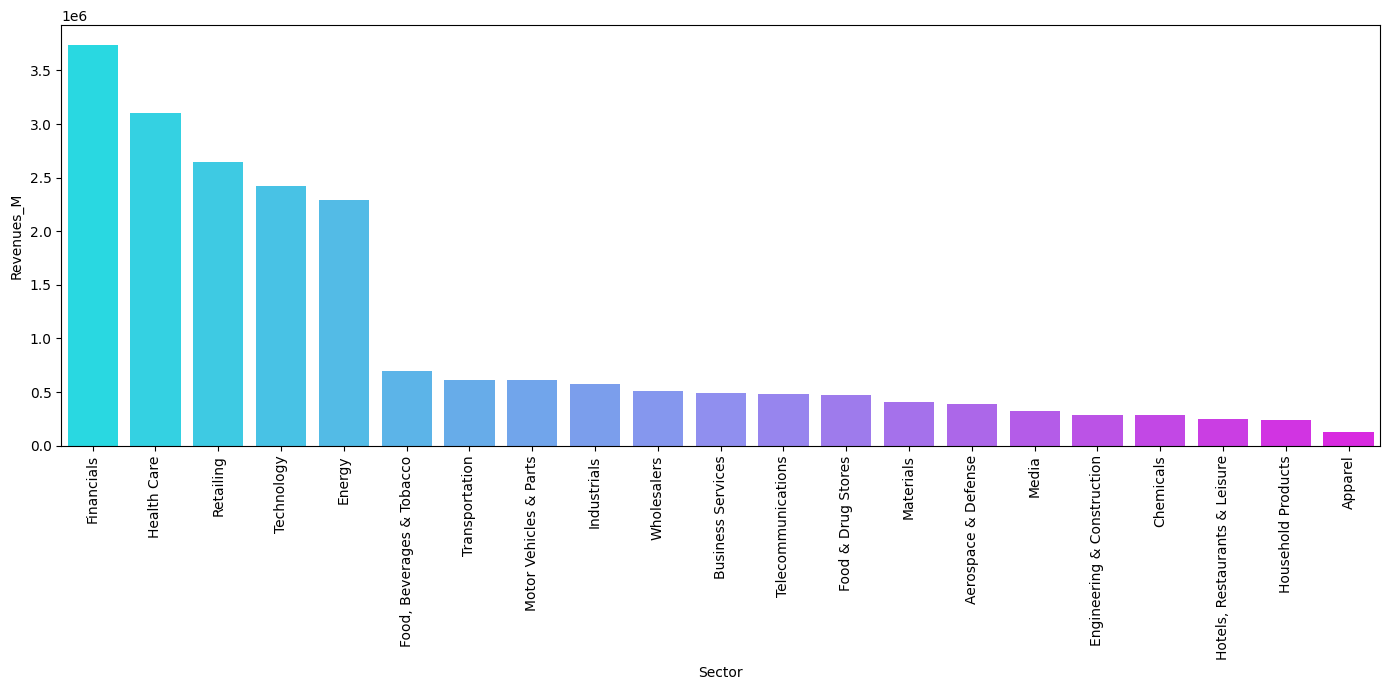

In [10]:
plt.figure(figsize=(14,7))
sns.barplot(total_revenue,x='Sector',y='Revenues_M',palette='cool',order=total_revenue.sort_values(by='Revenues_M',ascending=False).Sector)
plt.xticks(rotation=90)
plt.tight_layout()

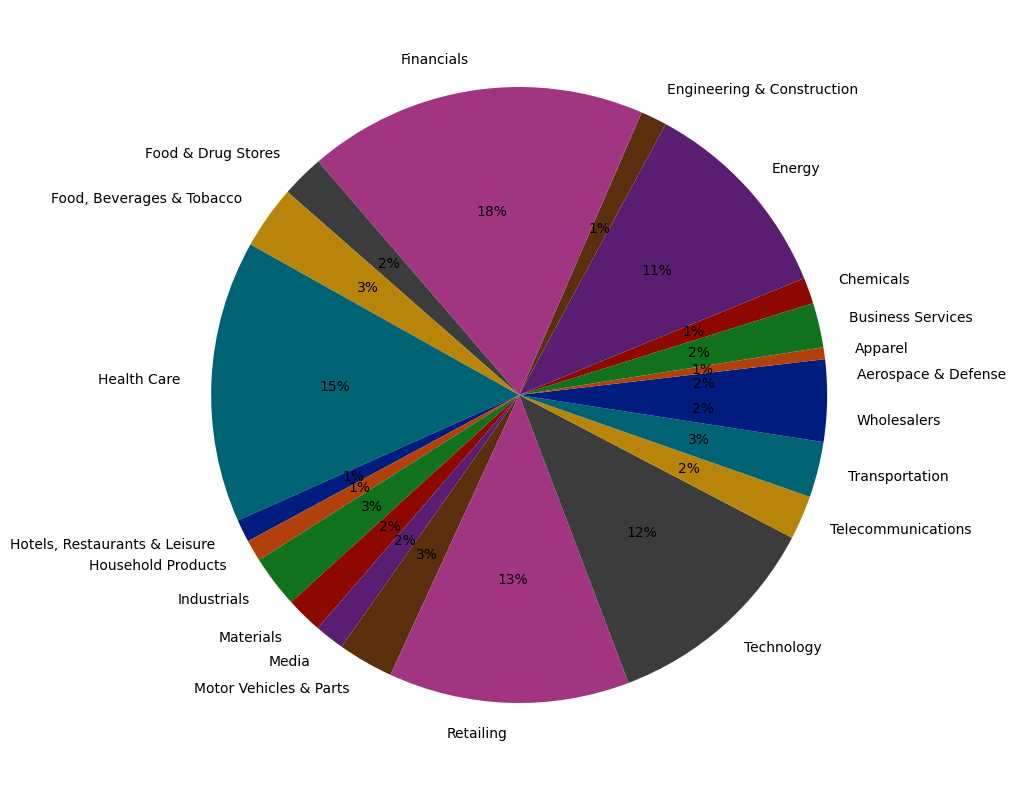

In [11]:
plt.figure(figsize=(14,10))
palette_color = sns.color_palette('dark') 
plt.pie(total_revenue['Revenues_M'], labels=total_revenue['Sector'], colors=palette_color, autopct='%.0f%%') 
  
plt.show() 

In [12]:
sector_count = df['Sector'].value_counts()
sector_count

Sector
Financials                       163
Technology                       115
Energy                           107
Health Care                       80
Retailing                         72
Business Services                 59
Industrials                       48
Materials                         47
Transportation                    39
Food, Beverages & Tobacco         35
Engineering & Construction        31
Wholesalers                       30
Hotels, Restaurants & Leisure     29
Chemicals                         26
Media                             26
Motor Vehicles & Parts            21
Household Products                20
Aerospace & Defense               19
Apparel                           15
Food & Drug Stores                 9
Telecommunications                 9
Name: count, dtype: int64

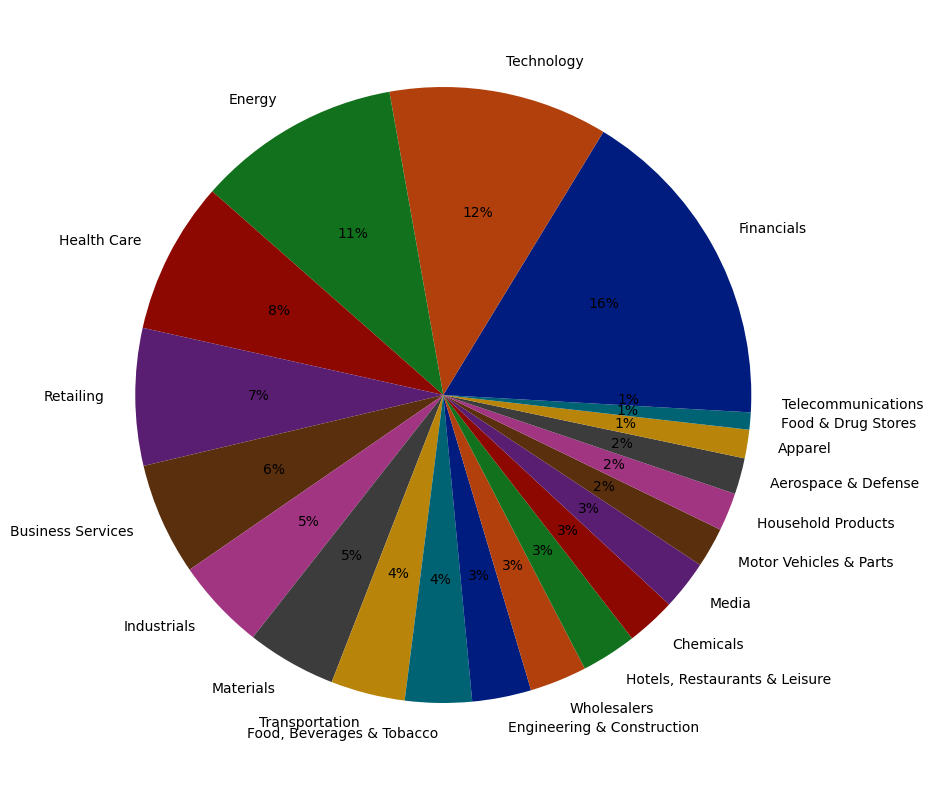

In [13]:
plt.figure(figsize=(14,10))
palette_color = sns.color_palette('dark') 
plt.pie(sector_count.values, labels=sector_count.index, colors=palette_color, autopct='%.0f%%') 
  
plt.show() 